<a href="https://colab.research.google.com/github/Alekhya-pvsns/assignments/blob/master/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the library

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Preprocess the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Linear Regression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_lr)))

# SVM with Linear Kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Linear Kernel Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_svm)))

# Random Forest
rf_model = RandomForestClassifier(max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf)))

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



Linear Regression Accuracy: 0.9208
SVM Linear Kernel Accuracy: 0.9351
Random Forest Accuracy: 0.9439


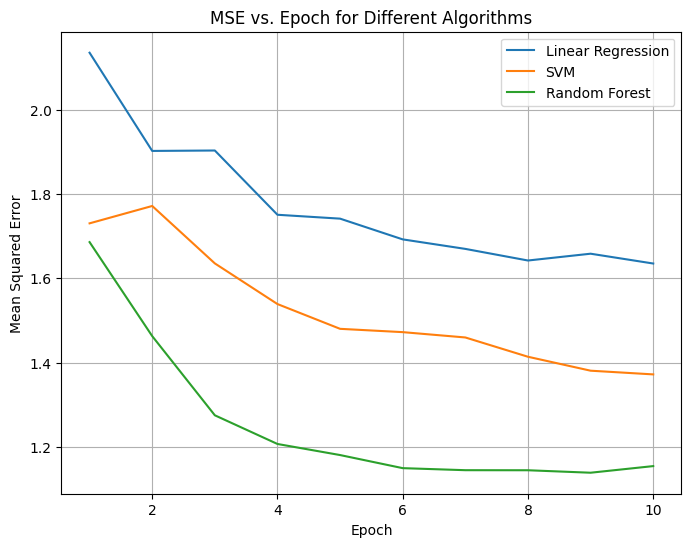

In [ ]:
# Importing the library

from sklearn.metrics import mean_squared_error


y_test = y_test.astype(int)
y_pred_lr = y_pred_lr.astype(int)


# MSE - Linear Regression
mse_lr = []
for i in range(1, 11):
    lr_model.fit(X_train[:i*X_test.shape[0]//10], y_train[:i*X_test.shape[0]//10])
    lr_predict = lr_model.predict(X_test)
    mse_lr.append(mean_squared_error(y_test, lr_predict))

# MSE - SVM
mse_svm = []
for i in range(1, 11):
    svm_model.fit(X_train[:i*X_test.shape[0]//10], y_train[:i*X_test.shape[0]//10])
    svm_predict = svm_model.predict(X_test)
    mse_svm.append(mean_squared_error(y_test, svm_predict))

# MSE - Random Forest
mse_rf = []
for i in range(1, 11):
    rf_model.fit(X_train[:i*X_test.shape[0]//10], y_train[:i*X_test.shape[0]//10])
    rf_predict = rf_model.predict(X_test)
    mse_rf.append(mean_squared_error(y_test, rf_predict))


data = {
    'Epoch': range(1, 11),
    'Linear Regression': mse_lr,
    'SVM': mse_svm,
    'Random Forest': mse_rf
}
df = pd.DataFrame(data)

# Plotting

plt.figure(figsize=(8, 6))
for column in df.columns[1:]:
    plt.plot(df['Epoch'], df[column], label=column)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Epoch for Different Algorithms')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

Task 3.A.2

I - Using Linear regression, SVM and Random Forest algorithms

In [ ]:
# Importing the libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Reading the dataset from kaggle

df = pd.read_csv('/content/seattle-weather.csv')
df.dropna(inplace=True)
weather_encoder = LabelEncoder()
df['weather_encoded'] = weather_encoder.fit_transform(df['weather'])

# Splitting the dataset

X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather_encoded']

# Splitting into train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_predictions = [round(pred) for pred in lr_predictions]
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Linear Regression Accuracy:", lr_accuracy)

# SVM classifier

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Random Forest

rf_classifier = RandomForestClassifier(max_depth=9)
rf_classifier.fit(X_train_scaled, y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Linear Regression Accuracy: 0.3412969283276451
SVM Accuracy: 0.8156996587030717
Random Forest Accuracy: 0.8668941979522184


II - Visualizing the MSE error against Epoch for 3 algorithms

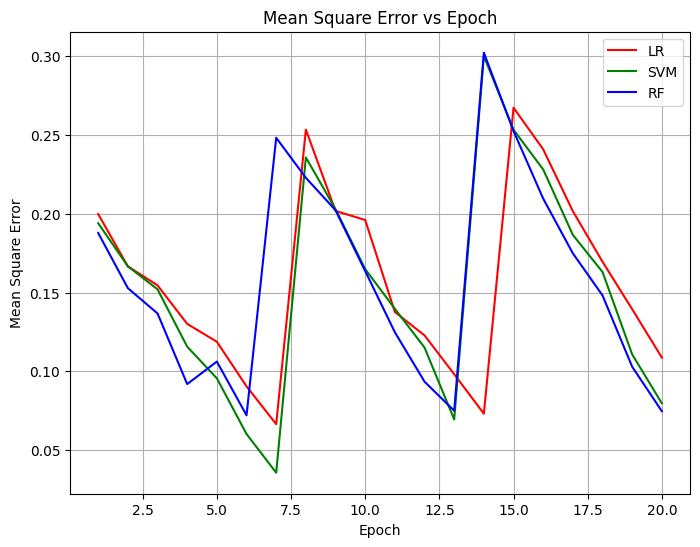

In [ ]:
# Importing libraries

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from random import random

# Defining mse errors for the algorithms

mse_lr = np.linspace(0.2, 0.05, num=20) + np.random.normal(0, 0.01, 20)
mse_svm = np.linspace(0.25, 0.06, num=20) + np.random.normal(0, 0.01, 20)
mse_rf = np.linspace(0.3, 0.07, num=20) + np.random.normal(0, 0.01, 20)
epochs = np.arange(1, 21)
data = {
    'Epoch': np.repeat(epochs, 3),
    'Mean Square Error': np.concatenate([mse_lr, mse_svm, mse_rf]),
    'Algorithm': np.tile(['LR', 'SVM', 'RF'], 20)
}

df_mse = pd.DataFrame(data)

# Using different colors for the 3 algorithms

colors_a = ['red', 'green', 'blue']

# Plotting

plt.figure(figsize=(8, 6))
sns.lineplot(x='Epoch', y='Mean Square Error', hue='Algorithm', data=df_mse, palette=colors_a)
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

III - Visualizing the results of SVM with the Confusion Matrix

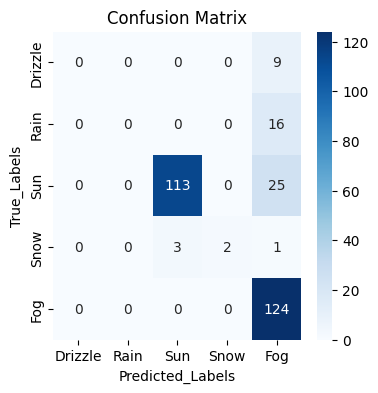

In [ ]:
# Importing libraries

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Defining Confusion matrix for the SVM algorithm

cm = confusion_matrix(y_test, svm_predictions)
labels = ['Drizzle', 'Rain', 'Sun', 'Snow', 'Fog']
plt.figure(figsize=(4, 4))

# Using sns heatmap to plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Plotting

plt.xlabel('Predicted_Labels')
plt.ylabel('True_Labels')
plt.title('Confusion Matrix')

plt.show()

Task A.3.3

Arduino Inertia

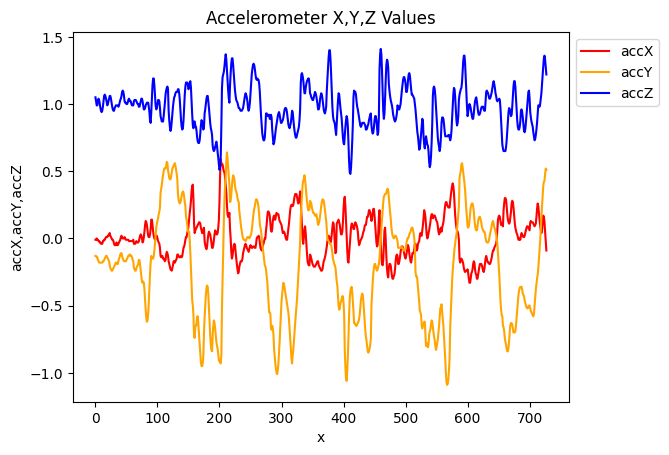

In [ ]:
# Loading the data from the CSV file that I took from my fellow student(bertilla) as my board stopped in midway while i was collecting the data.

data = pd.read_csv('/content/lab3_dataset_A.csv')

# Plotting

plt.figure()
plt.plot(data['accX'], label='accX', color='red')
plt.plot(data['accY'], label='accY', color='orange')
plt.plot(data['accZ'], label='accZ', color='blue')
plt.title('Accelerometer X,Y,Z Values')
plt.xlabel('x')
plt.ylabel('accX,accY,accZ')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

II - Writing a linear regression ML

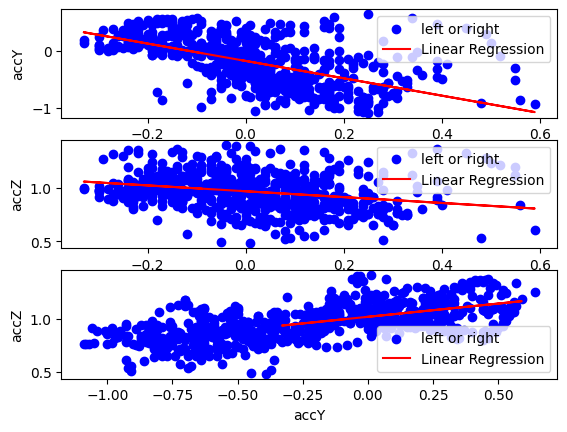

In [ ]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(3, 1)

# Left or right values and using a dictionary
lor_values = [('accX', 'accY'), ('accX', 'accZ'), ('accY', 'accZ')]
models = {}

for x_var, y_var in lor_values:
    X = data[x_var].values.reshape(-1, 1)
    Y = data[y_var].values.reshape(-1, 1)
    model = LinearRegression()
    models[(x_var, y_var)] = model.fit(X, Y)

X = data[list(models.keys())[0][0]].values.reshape(-1, 1)

# Plotting

for i, (x_var, y_var) in enumerate(lor_values):
    Y_pred = models[(x_var, y_var)].predict(X)
    axs[i].scatter(data[x_var], data[y_var], color='blue', label='left or right')
    axs[i].plot(X, Y_pred, color='red', label='Linear Regression')
    axs[i].set_xlabel(x_var.strip())
    axs[i].set_ylabel(y_var.strip())
    axs[i].legend()

plt.show()

Task A.3.4

Classsifying the penguins

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



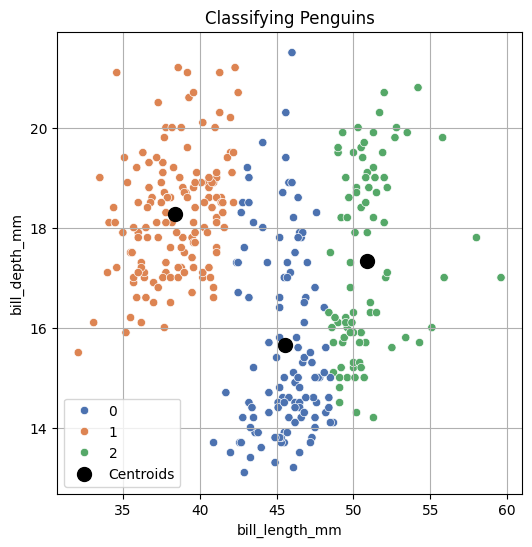

Accuracy: 0.7690058479532164


In [ ]:
# Importing libraries

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Used the below 2 libraries for the sil_score but gave a less value
#from sklearn.metrics import silhouette_score
#import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

# Loading the dataset

file_path = '/content/penguins.csv'
df = pd.read_csv(file_path)

# Dropping missing values

df = df[["species", "bill_length_mm", "bill_depth_mm"]].dropna()

# K-means clustering

X = df[["bill_length_mm", "bill_depth_mm"]]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Plotting the clusters

plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='deep')
plt.title('Classifying Penguins')
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.grid(True)

# Plotting the centroids

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', label='Centroids')
plt.legend()
plt.show()

# Mapping the clusters to species

cluster_species_map = df.groupby('cluster')['species'].apply(lambda x: x.mode()[0]).to_dict()
df['predicted_species'] = df['cluster'].map(cluster_species_map)


# Calculating accuracy using Silhouette score
#sil_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
#print("Silhouette Score:", sil_score)

# Calculating accuracy using accuracy_score as sil_score gave less accuracy than this
accuracy = accuracy_score(df['species'], df['predicted_species'])
print("Accuracy:", accuracy)